<a href="https://colab.research.google.com/github/gordoaraujo/cl_churn_prediction/blob/main/notebooks/Alaa_unsuprvised_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#load libraries
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report


# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("talk")

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [10]:
orig_url = "https://drive.google.com/file/d/1h44x4nReydrfKvwwDbXjajhDvyHUCmoz/view?usp=sharing"
file_id = orig_url.split('/')[-2]
data_path='https://drive.google.com/uc?export=download&id=' + file_id
df = pd.read_csv(data_path)

In [105]:
orig_url = "https://drive.google.com/file/d/1-U1Ib1T2QOkV3AWQaSkPsbDL25JCn01g/view?usp=sharing"
file_id = orig_url.split('/')[-2]
data_path='https://drive.google.com/uc?export=download&id=' + file_id
df_onehot = pd.read_csv(data_path)
df_onehot.dropna(inplace= True)

In [108]:
#df.info()

In [109]:
#df_onehot.info()

In [110]:
df_onehot.columns

Index(['SeniorCitizen', 'tenure', 'PhoneService', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'cat_gender_Female', 'cat_gender_Male',
       'cat_Partner_No', 'cat_Partner_Yes', 'cat_Dependents_No',
       'cat_Dependents_Yes', 'cat_InternetService_DSL',
       'cat_InternetService_Fiber optic', 'cat_InternetService_No',
       'cat_OnlineSecurity_No', 'cat_OnlineSecurity_No internet service',
       'cat_OnlineSecurity_Yes', 'cat_OnlineBackup_No',
       'cat_OnlineBackup_No internet service', 'cat_OnlineBackup_Yes',
       'cat_DeviceProtection_No', 'cat_DeviceProtection_No internet service',
       'cat_DeviceProtection_Yes', 'cat_TechSupport_No',
       'cat_TechSupport_No internet service', 'cat_TechSupport_Yes',
       'cat_StreamingTV_No', 'cat_StreamingTV_No internet service',
       'cat_StreamingTV_Yes', 'cat_StreamingMovies_No',
       'cat_StreamingMovies_No internet service', 'cat_StreamingMovies_Yes',
       'cat_Contract_Month-to-month', 'cat_Contract_One year',
  

In [113]:
X = df_onehot[[
       'cat_gender_Female', 'SeniorCitizen', 'cat_Partner_Yes',
        'cat_Dependents_Yes', 'tenure',
       'PhoneService',
       'cat_InternetService_DSL', 'cat_InternetService_Fiber optic','cat_InternetService_No',
       'cat_OnlineSecurity_No', 'cat_OnlineSecurity_Yes',
       'cat_OnlineBackup_No','cat_OnlineBackup_Yes',
        'cat_DeviceProtection_No', 'cat_DeviceProtection_Yes',
       'cat_TechSupport_No',  'cat_TechSupport_Yes',
       'cat_StreamingTV_No', 'cat_StreamingTV_Yes',
       'cat_StreamingMovies_No','cat_StreamingMovies_Yes',
       'cat_Contract_Month-to-month', 'cat_Contract_One year','cat_Contract_Two year',
       'cat_PaymentMethod_Automatic','cat_PaymentMethod_Electronic check', 'cat_PaymentMethod_Mailed check',
        'cat_PaperlessBilling_Yes', 'MonthlyCharges', 'TotalCharges'
       ]].copy()
y = df_onehot[['Churn']].copy()

# Describtive analysis

- value_counts, et

In [114]:
df_onehot['Churn'].value_counts(normalize = True)

0    0.734881
1    0.265119
Name: Churn, dtype: float64

# Feature enginering

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder 

In [62]:
X_ = df.drop(columns = ['Churn'])
y_ = df['Churn'].replace({'No':0,'Yes':1 })

In [58]:
categorical_features = X_.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_features = X_.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_transformer = Pipeline(steps=[("onehot", OneHotEncoder(handle_unknown="ignore"))])
numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])
preprocessor = ColumnTransformer(transformers=[
                                               ("num", numeric_transformer, numeric_features),
                                               ("cat", categorical_transformer, categorical_features)
                                               ])
preprocessor


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['tenure', 'MonthlyCharges', 'TotalCharges']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['gender', 'SeniorCitizen', 'Partner',
                                  'Dependents', 'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'Contract',
                                  'PaperlessBilling', 'PaymentMethod'])])

# Clustring 

- Distance based: k-means, k-medoids

- Tree baesd I believe this could be the one the one):
 Hir. clustring (agglomerative). Try different metrics.
 isloation forest?

- Density approach: DBScan

Recall to get the best result it is better to use different techniques on the unsupervised model than the one used for the supervised model. 

## k-means

In [117]:
X.shape

(5986, 30)

For n_clusters = 2 The average silhouette_score is : 0.7037
For n_clusters = 3 The average silhouette_score is : 0.644
For n_clusters = 4 The average silhouette_score is : 0.6037
For n_clusters = 5 The average silhouette_score is : 0.5964
For n_clusters = 6 The average silhouette_score is : 0.5953
For n_clusters = 7 The average silhouette_score is : 0.5827
For n_clusters = 8 The average silhouette_score is : 0.5725
For n_clusters = 9 The average silhouette_score is : 0.5703
For n_clusters = 10 The average silhouette_score is : 0.5635


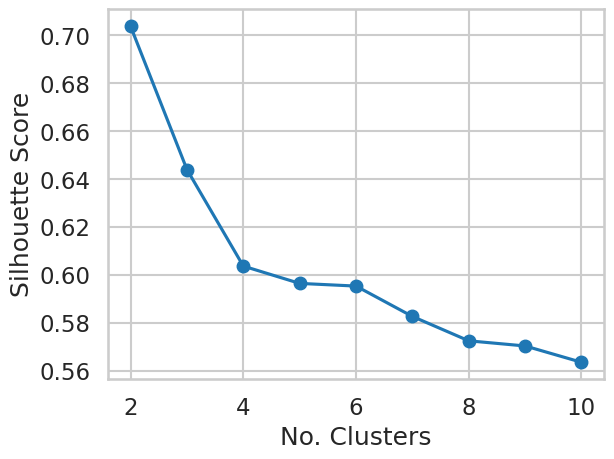

In [115]:
silhouette_s = []

for n_clusters in range(2, 11):
    kmeans_pipeline = Pipeline([
        #("scaler", StandardScaler()),
        ("cluster", KMeans(n_clusters=n_clusters))])
    
    cluster_labels = kmeans_pipeline.fit_predict(X)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_score(X, cluster_labels).round(4))
    silhouette_s.append(silhouette_score(X, cluster_labels))
    
plt.plot(range(2, 11),silhouette_s, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [116]:
K_means = KMeans(n_clusters=2)
cluster_labels = K_means.fit_predict(X)
print(classification_report(y, cluster_labels));

              precision    recall  f1-score   support

           0       0.69      0.66      0.67      4399
           1       0.16      0.17      0.16      1587

    accuracy                           0.53      5986
   macro avg       0.42      0.42      0.42      5986
weighted avg       0.55      0.53      0.54      5986



## Hierarchical - Agglomerative Clustering

In [14]:
#df.drop(columns=['Churn'])

For n_clusters = 2 The average silhouette_score is : 0.681
For n_clusters = 3 The average silhouette_score is : 0.614
For n_clusters = 4 The average silhouette_score is : 0.612
For n_clusters = 5 The average silhouette_score is : 0.5769
For n_clusters = 6 The average silhouette_score is : 0.5762
For n_clusters = 7 The average silhouette_score is : 0.5734
For n_clusters = 8 The average silhouette_score is : 0.5364
For n_clusters = 9 The average silhouette_score is : 0.5441
For n_clusters = 10 The average silhouette_score is : 0.5388


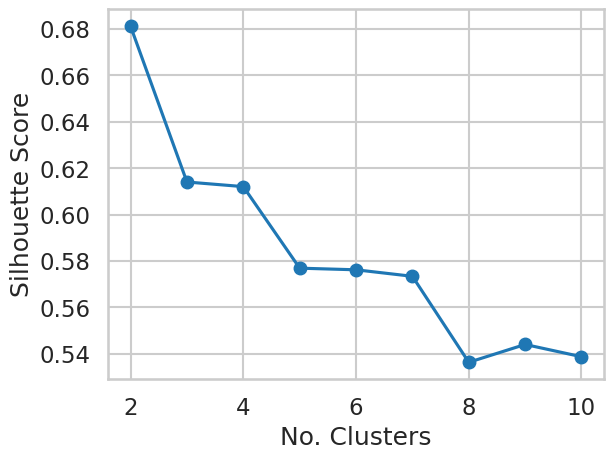

In [118]:
from sklearn.cluster import AgglomerativeClustering

silhouette_s = []

for n_clusters in range(2, 11):
    agglo_pipeline = Pipeline([
    #("scaler", StandardScaler()),
    ("cluster", AgglomerativeClustering(n_clusters=n_clusters))])
    
    cluster_labels = agglo_pipeline.fit_predict(X)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_score(X, cluster_labels).round(4))
    silhouette_s.append(silhouette_score(X, cluster_labels))
    
plt.plot(range(2, 11),silhouette_s, "o-")
plt.xlabel("No. Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [120]:
Agglomerative_Clustering = AgglomerativeClustering(n_clusters=2)
cluster_labels = Agglomerative_Clustering.fit_predict(X)
print(classification_report(y, cluster_labels));

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      4399
           1       0.15      0.12      0.14      1587

    accuracy                           0.58      5986
   macro avg       0.42      0.43      0.43      5986
weighted avg       0.55      0.58      0.57      5986



## Isolation Forest

In [121]:
from sklearn.ensemble import IsolationForest
profit_ifmodel = IsolationForest(n_estimators=100, contamination=0.263)
profit_ifmodel.fit(X)
f = lambda x: 1 if x ==-1 else 0
cluster_labels=[f(x) for x in profit_ifmodel.predict(X)]
print(classification_report(y, cluster_labels));

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      4399
           1       0.15      0.15      0.15      1587

    accuracy                           0.55      5986
   macro avg       0.42      0.43      0.42      5986
weighted avg       0.55      0.55      0.55      5986



#Playing with data without removing columns

In [130]:
pipeline_kmeans_2 = Pipeline(steps=[
                              ("pre_process", preprocessor), 
                              ("model", KMeans(n_clusters=2))
                              ])
pipeline_kmeans_2.fit(X_)
Kmeans_2_labels = pipeline_kmeans_2.predict(X_) 
print(classification_report(y_, Kmeans_2_labels));

              precision    recall  f1-score   support

           0       0.68      0.73      0.71      4399
           1       0.08      0.06      0.07      1587

    accuracy                           0.55      5986
   macro avg       0.38      0.40      0.39      5986
weighted avg       0.52      0.55      0.54      5986



In [131]:
pipeline_kmeans4 = Pipeline(steps=[
                              ("pre_process", preprocessor), 
                              ("model", KMeans(n_clusters=4))
                              ])
pipeline_kmeans4.fit(X_)
Kmeans_4_labels = pipeline_kmeans4.predict(X_) 

In [126]:
df_merged= df.copy()
df_merged ['Kmeans_4'] = Kmeans_4_labels
df_merged.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Kmeans_4
0,Male,No,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Automatic,24.10,1734.65,No,3
1,Female,No,No,No,44,Yes,No,Fiber optic,No,Yes,...,No,Yes,No,Month-to-month,Yes,Automatic,88.15,3973.20,No,2
2,Female,Yes,Yes,No,38,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Automatic,74.95,2869.85,Yes,2
3,Male,No,No,No,4,Yes,No,DSL,No,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,0
4,Male,No,No,No,2,Yes,No,DSL,Yes,No,...,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,0


In [127]:
res = pd.crosstab(df_merged.Kmeans_4, df_merged.Churn)
res

Churn,No,Yes
Kmeans_4,,
0,1049,363
1,1467,237
2,691,888
3,1192,99


In [84]:
res = pd.crosstab(df_merged.Kmeans_4, df_merged.PhoneService)
res

PhoneService,No,Yes
Kmeans_4,,
0,94,1610
1,0,1291
2,0,1579
3,496,916


In [85]:
res = pd.crosstab(df_merged.Kmeans_4, df_merged.InternetService)
res

InternetService,DSL,Fiber optic,No
Kmeans_4,,,
0,630,1074,0
1,0,0,1291
2,28,1551,0
3,1410,2,0


In [88]:
df_merged[df_merged["Kmeans_4"] ==2]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Kmeans_4
1,Female,No,No,No,44,Yes,No,Fiber optic,No,Yes,...,No,Yes,No,Month-to-month,Yes,Automatic,88.15,3973.20,No,2
2,Female,Yes,Yes,No,38,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Automatic,74.95,2869.85,Yes,2
6,Female,No,No,No,33,Yes,Yes,Fiber optic,Yes,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,90.65,2989.60,No,2
16,Male,No,No,No,1,Yes,No,Fiber optic,No,No,...,Yes,No,No,Month-to-month,Yes,Mailed check,74.30,74.30,No,2
18,Female,No,Yes,Yes,42,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.20,4186.30,Yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5969,Female,No,No,No,13,Yes,Yes,Fiber optic,No,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,85.95,1215.65,No,2
5973,Female,Yes,Yes,No,1,Yes,No,Fiber optic,No,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,76.40,76.40,Yes,2
5975,Female,No,No,Yes,16,Yes,Yes,Fiber optic,No,No,...,Yes,No,No,One year,Yes,Automatic,79.50,1264.20,No,2
5981,Male,No,Yes,No,1,Yes,No,Fiber optic,Yes,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00,Yes,2


# Some visulatization and analysis 

#K-means clusters

In [137]:
X_merged = X.copy()
X_merged['Churn'] = y

In [139]:
K_means = KMeans(n_clusters=4)
Kmeans_labels4 = K_means.fit_predict(X)
X_merged['Kmeans_4'] = Kmeans_labels4
K_means = KMeans(n_clusters=5)
Kmeans_labels5 = K_means.fit_predict(X)
X_merged['Kmeans_5'] = Kmeans_labels5

In [140]:
X_merged.head()

,cat_gender_Female,SeniorCitizen,cat_Partner_Yes,cat_Dependents_Yes,tenure,PhoneService,cat_InternetService_DSL,cat_InternetService_Fiber optic,cat_InternetService_No,cat_OnlineSecurity_No,...,cat_Contract_Two year,cat_PaymentMethod_Automatic,cat_PaymentMethod_Electronic check,cat_PaymentMethod_Mailed check,cat_PaperlessBilling_Yes,MonthlyCharges,TotalCharges,Churn,Kmeans_4,Kmeans_5
0,0,0,1,1,72,2,0,0,1,0,...,1,1,0,0,0,24.10,1734.65,0,3,4
1,1,0,0,0,44,1,0,1,0,1,...,0,1,0,0,1,88.15,3973.20,0,1,2
2,1,1,1,0,38,2,0,1,0,1,...,0,1,0,0,1,74.95,2869.85,1,3,2
3,0,0,0,0,4,1,1,0,0,1,...,0,0,1,0,1,55.90,238.50,0,0,1
4,0,0,0,0,2,1,1,0,0,0,...,0,0,1,0,0,53.45,119.50,0,0,1


In [147]:
X_merged.Churn.value_counts()

0    4399
1    1587
Name: Churn, dtype: int64

In [152]:
res = pd.crosstab(X_merged.Kmeans_4, X_merged.Churn)
res['0%'] = res.iloc[:,0]/4399
res['1%'] = res.iloc[:,1]/1587
res

Churn,0,1,0%,1%
Kmeans_4,,,,
0,1748,978,0.397363,0.616257
1,822,178,0.186861,0.112161
2,715,107,0.162537,0.067423
3,1114,324,0.253239,0.204159


In [154]:
res = pd.crosstab(X_merged.Kmeans_5, X_merged.Churn)
res['0%'] = res.iloc[:,0]/4399
res['1%'] = res.iloc[:,1]/1587
res

Churn,0,1,0%,1%
Kmeans_5,,,,
0,636,125,0.144578,0.078765
1,1532,897,0.348261,0.565217
2,673,192,0.152989,0.120983
3,467,66,0.106160,0.041588
4,1091,307,0.248011,0.193447


#Hir. clusters

In [144]:
Agglomerative_Clustering = AgglomerativeClustering(n_clusters=4)
Hir_labels4 = Agglomerative_Clustering.fit_predict(X)
X_merged['Hir_4'] = Hir_labels4
Agglomerative_Clustering = AgglomerativeClustering(n_clusters=5)
Hir_labels5 = Agglomerative_Clustering.fit_predict(X)
X_merged['Hir_5'] = Hir_labels5

In [155]:
res = pd.crosstab(X_merged.Hir_4, X_merged.Churn)
res['0%'] = res.iloc[:,0]/4399
res['1%'] = res.iloc[:,1]/1587
res

Churn,0,1,0%,1%
Hir_4,,,,
0,2474,1145,0.562401,0.721487
1,577,81,0.131166,0.051040
2,791,245,0.179814,0.154379
3,557,116,0.126620,0.073094


# What we can say about the clusters? What do they have in common?

add the index of the cluster as afeature and do a scatter plot 

In [161]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,No,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Automatic,24.10,1734.65,No
1,Female,No,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Automatic,88.15,3973.20,No
2,Female,Yes,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Automatic,74.95,2869.85,Yes
3,Male,No,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,Male,No,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


In [162]:
df['kmeans-4'] = Kmeans_labels4

In [169]:
res = pd.crosstab(X_merged.Kmeans_4, X_merged.Churn)
res['0%'] = res.iloc[:,0]/4399
res['1%'] = res.iloc[:,1]/1587
res

Churn,0,1,0%,1%
Kmeans_4,,,,
0,1748,978,0.397363,0.616257
1,822,178,0.186861,0.112161
2,715,107,0.162537,0.067423
3,1114,324,0.253239,0.204159


In [168]:
df.groupby(["Churn", "kmeans-4","Contract"]).Contract.count()

Churn  kmeans-4  Contract      
No     0         Month-to-month    1068
                 One year           354
                 Two year           326
       1         Month-to-month     236
                 One year           283
                 Two year           303
       2         Month-to-month      87
                 One year           181
                 Two year           447
       3         Month-to-month     480
                 One year           310
                 Two year           324
Yes    0         Month-to-month     956
                 One year            18
                 Two year             4
       1         Month-to-month     126
                 One year            41
                 Two year            11
       2         Month-to-month      30
                 One year            54
                 Two year            23
       3         Month-to-month     286
                 One year            35
                 Two year             3
Name: Co

In [172]:
res = pd.crosstab(df['kmeans-4'], df.Contract)
res

Contract,Month-to-month,One year,Two year
kmeans-4,,,
0,2024,372,330
1,362,324,314
2,117,235,470
3,766,345,327


In [173]:
res = pd.crosstab(df['kmeans-4'], df.MultipleLines)
res

MultipleLines,No,No phone service,Yes
kmeans-4,,,
0,1846,304,576
1,299,83,618
2,115,0,707
3,588,203,647


In [174]:
res = pd.crosstab(df['kmeans-4'], df.InternetService)
res

InternetService,DSL,Fiber optic,No
kmeans-4,,,
0,880,827,1019
1,445,555,0
2,158,664,0
3,585,581,272


In [184]:
df.groupby(['Churn']).tenure.median()

Churn
No     37.0
Yes    10.0
Name: tenure, dtype: float64

In [175]:
df.groupby(['Churn']).tenure.mean()

Churn
No     37.599682
Yes    18.246377
Name: tenure, dtype: float64

In [208]:
res = pd.crosstab(df['Churn'], df.SeniorCitizen)
res

SeniorCitizen,No,Yes
Churn,,
No,3835,564
Yes,1185,402


<Axes: >

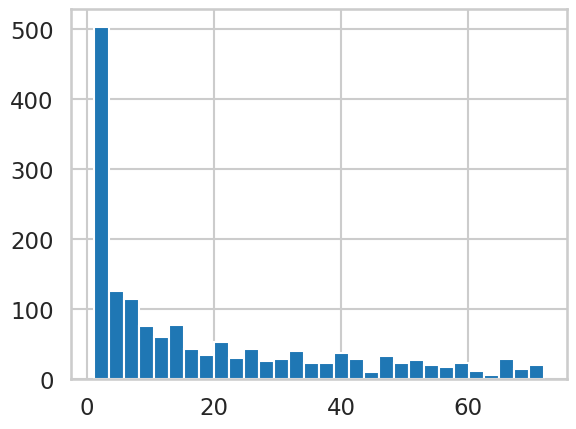

In [186]:
df[df.Churn == 'Yes']['tenure'].hist(bins =30)

In [220]:
df.InternetService.value_counts()

Fiber optic    2627
DSL            2068
No             1291
Name: InternetService, dtype: int64

<Axes: >

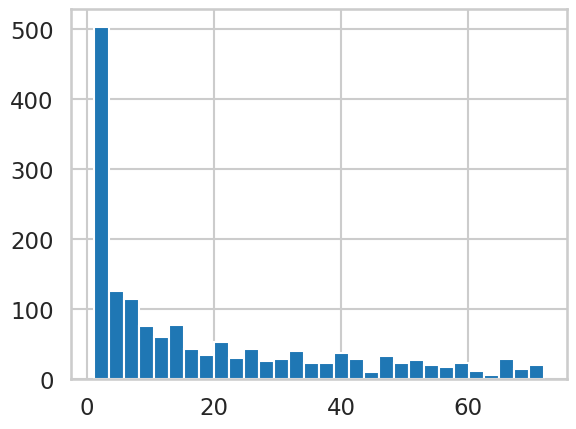

In [221]:
df[(df.Churn == 'Yes')&(df.InternetService !='NO')]['tenure'].hist(bins =30)

In [223]:
df[(df.InternetService =='NO')&(df.PhoneService =='NO')]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,kmeans-4


In [229]:
df.InternetService.value_counts()

Fiber optic    2627
DSL            2068
No             1291
Name: InternetService, dtype: int64

In [228]:
df.PhoneService.value_counts()

Yes    5396
No      590
Name: PhoneService, dtype: int64

In [234]:
df[(df.Churn == 'Yes')&(df.PhoneService =='Yes')].shape

(1438, 21)

In [236]:
df.Churn.value_counts()

No     4399
Yes    1587
Name: Churn, dtype: int64

In [247]:
df[(df.Churn == 'Yes')]['SeniorCitizen'].value_counts()

No     1185
Yes     402
Name: SeniorCitizen, dtype: int64

In [246]:
df[(df.Churn == 'Yes')&(df.InternetService !='No')&(df.PhoneService !='No')]['SeniorCitizen'].value_counts()

No     981
Yes    358
Name: SeniorCitizen, dtype: int64

In [245]:
df[(df.Churn == 'Yes')&(df.InternetService !='No')&(df.PhoneService =='No')]['SeniorCitizen'].value_counts()

No     109
Yes     40
Name: SeniorCitizen, dtype: int64

In [243]:
149/590

0.25254237288135595

In [250]:
df.groupby(['Churn', 'PhoneService','InternetService']).Churn.count()

Churn  PhoneService  InternetService
No     No            DSL                 441
       Yes           DSL                1230
                     Fiber optic        1536
                     No                 1192
Yes    No            DSL                 149
       Yes           DSL                 248
                     Fiber optic        1091
                     No                   99
Name: Churn, dtype: int64

In [249]:
df[(df.Churn == 'Yes')&(df.InternetService =='No')&(df.PhoneService !='No')].shape

(99, 21)

In [242]:
df[(df.Churn == 'Yes')&(df.InternetService !='No')&(df.PhoneService =='No')].shape

(149, 21)

In [241]:
df[(df.InternetService !='No')&(df.PhoneService =='No')].shape

(590, 21)

In [239]:
df[(df.InternetService =='No')&(df.PhoneService =='Yes')].shape

(1291, 21)

In [237]:
df[(df.Churn == 'No')&(df.InternetService =='No')&(df.PhoneService =='Yes')].shape

(1192, 21)

In [233]:
df[(df.Churn == 'Yes')&(df.InternetService =='No')&(df.PhoneService =='Yes')].shape

(99, 21)

In [232]:
df[(df.Churn == 'Yes')].shape

(1587, 21)

In [231]:
df[(df.Churn == 'Yes')&(df.InternetService !='No')&(df.PhoneService =='Yes')].shape

(1339, 21)

<Axes: >

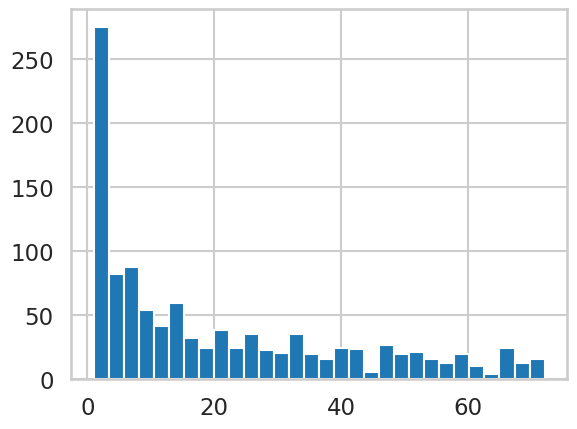

In [217]:
df[(df.Churn == 'Yes')&(df.InternetService =='Fiber optic')]['tenure'].hist(bins =30)

In [213]:
df[(df.Churn == 'Yes')&(df.tenure <12)&(df.InternetService =='Fiber optic')].shape

(517, 21)

In [ ]:
df[(df.Churn == 'Yes')&(df.tenure <12)&(df.InternetService =='Fiber optic')].shape

In [212]:
df[(df.Churn == 'Yes')&(df.tenure <12)&(df.InternetService =='Fiber optic')&(df.SeniorCitizen =='No')].shape

(380, 21)

In [210]:
df[(df.Churn == 'Yes')&(df.tenure <12)&(df.SeniorCitizen =='No')].shape

(665, 21)

In [211]:
df[(df.Churn == 'Yes')&(df.tenure >12)&(df.SeniorCitizen =='Yes')].shape

(214, 21)

In [209]:
df[(df.Churn == 'Yes')&(df.tenure <12)&(df.SeniorCitizen =='Yes')].shape

(181, 21)

In [191]:
df[(df.Churn == 'Yes')&(df.tenure <12)].shape

(846, 21)

In [203]:
df[(df.Churn == 'Yes')&(df.tenure <12)&(df.PaymentMethod =='Mailed check')].shape

(201, 21)

In [202]:
df[(df.Churn == 'Yes')&(df.tenure <12)&(df.PaymentMethod =='Electronic check')].shape

(496, 21)

In [201]:
df[(df.Churn == 'Yes')&(df.tenure <12)&(df.PaymentMethod =='Automatic')].shape

(149, 21)

In [199]:
df[(df.Churn == 'Yes')&(df.tenure <12)&(df.InternetService =='Fiber optic')].shape

(517, 21)

In [196]:
df[(df.Churn == 'Yes')&(df.tenure <12)&(df.MultipleLines =='Yes')].shape

(252, 21)

In [190]:
df[df.Churn == 'Yes'].shape

(1587, 21)

Extra: 

 - Do we need to use dimension reduction? 
 - Can we borrow some techniques from anomaly detection?

In [251]:
df_onehot.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,kmeans-4
0,Male,No,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Automatic,24.10,1734.65,No,3
1,Female,No,No,No,44,Yes,No,Fiber optic,No,Yes,...,No,Yes,No,Month-to-month,Yes,Automatic,88.15,3973.20,No,1
2,Female,Yes,Yes,No,38,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Automatic,74.95,2869.85,Yes,3
3,Male,No,No,No,4,Yes,No,DSL,No,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No,0
4,Male,No,No,No,2,Yes,No,DSL,Yes,No,...,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No,0


In [252]:
df_onehot.head()

,SeniorCitizen,tenure,PhoneService,MonthlyCharges,TotalCharges,Churn,cat_gender_Female,cat_gender_Male,cat_Partner_No,cat_Partner_Yes,...,cat_StreamingMovies_No internet service,cat_StreamingMovies_Yes,cat_Contract_Month-to-month,cat_Contract_One year,cat_Contract_Two year,cat_PaperlessBilling_No,cat_PaperlessBilling_Yes,cat_PaymentMethod_Automatic,cat_PaymentMethod_Electronic check,cat_PaymentMethod_Mailed check
0,0,72,2,24.10,1734.65,0,0,1,0,1,...,1,0,0,0,1,1,0,1,0,0
1,0,44,1,88.15,3973.20,0,1,0,1,0,...,0,0,1,0,0,0,1,1,0,0
2,1,38,2,74.95,2869.85,1,1,0,0,1,...,0,0,1,0,0,0,1,1,0,0
3,0,4,1,55.90,238.50,0,0,1,1,0,...,0,1,1,0,0,0,1,0,1,0
4,0,2,1,53.45,119.50,0,0,1,1,0,...,0,0,1,0,0,1,0,0,1,0
